In [1]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline
from pandas.plotting import parallel_coordinates
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.datasets import load_breast_cancer
from time import time
from sklearn import metrics

In [2]:
# define the size of the outout graph in later
size = (10, 6)
# load data
data_set = load_breast_cancer(as_frame=True)
X = data_set.data
y = data_set.target
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
scaler = StandardScaler()
scaler.fit(X)

data_scaled = scaler.transform(X)
X = pd.DataFrame(data = data_scaled, columns = X.columns)

# X = scaler.transform(X)

C:\Division\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Division\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Division\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

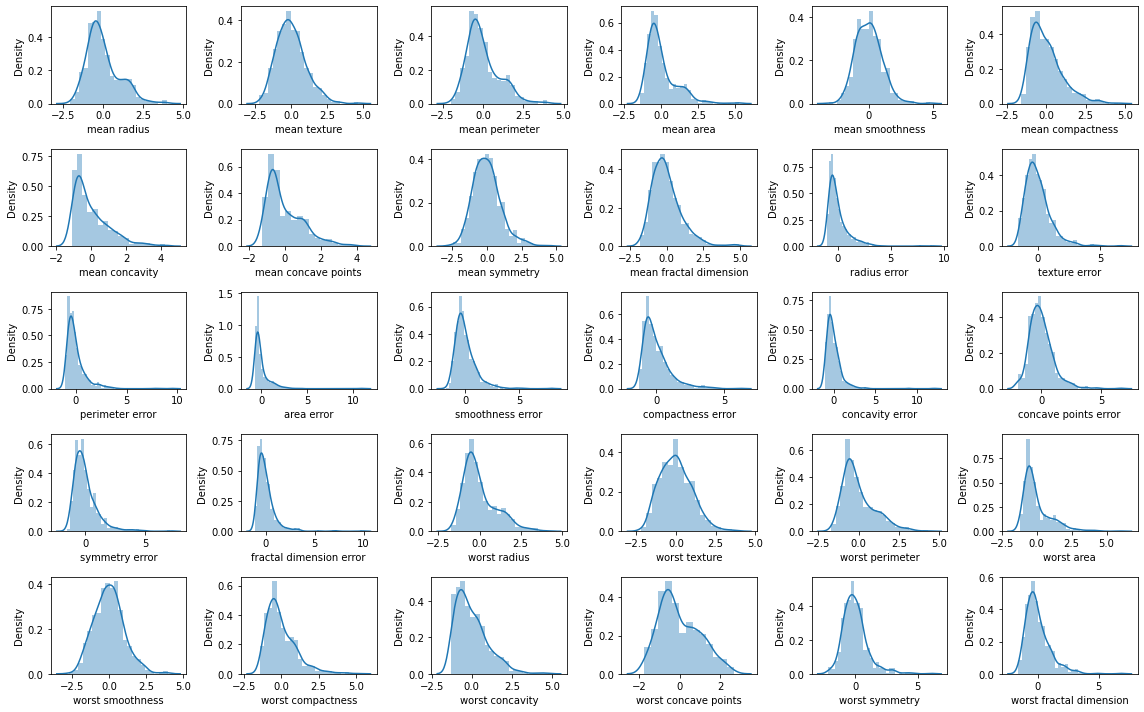

In [4]:
rows = 5
cols = 6

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10))

col = X.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(X[col[index]], ax=ax[i][j])
        index = index + 1

plt.tight_layout()

In [5]:
ks = [2,4,6,8,10, 15, 20, 30, 50]

D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Program\Anaconda\envs\deepL\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

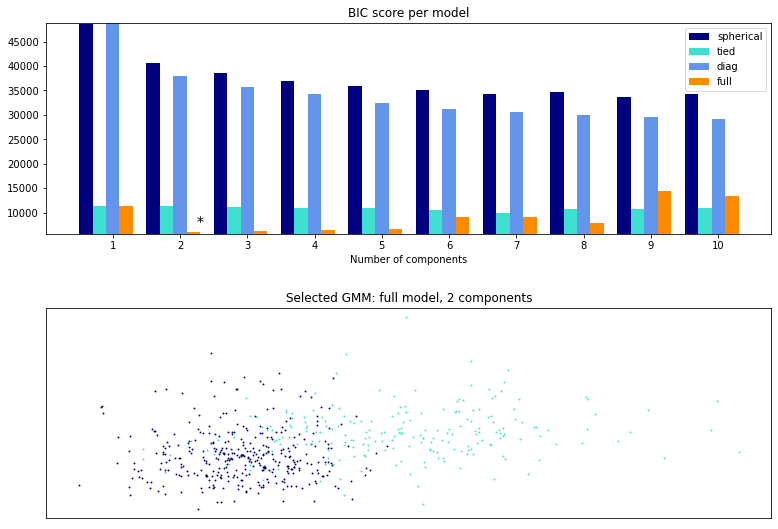

In [9]:
import itertools
import matplotlib as mpl
from scipy import linalg

lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(
    ["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(13, 8))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range): (i + 1)
                * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(np.array(X)[Y_ == i, 0], np.array(X)
                [Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()


In [10]:

times = []
bic = []
aic = []
silhouette = []
other_metrics = []

lowest_bic = np.infty
best_k = None
best_gmm = None
n_components_range = ks
cv_types = ["full"]
for n_components in n_components_range:
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=n_components)

    t0 = time()
    r = gmm.fit(X)
    print(r.converged_)
    fit_time = time() - t0
    times.append(fit_time)

    aic.append(gmm.aic(X))

    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm
        best_k = n_components

    prediction = gmm.predict(X)

    silhouette.append(
            metrics.silhouette_score(
                X,
                prediction,
                metric="euclidean",
                sample_size=300,
            )
    )

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    other_metrics.append([m(y, prediction) for m in clustering_metrics])

bic = np.array(bic)
aic = np.array(aic)
other_metrics = np.array(other_metrics).T

True
True
True
True
True
True
True
True
True


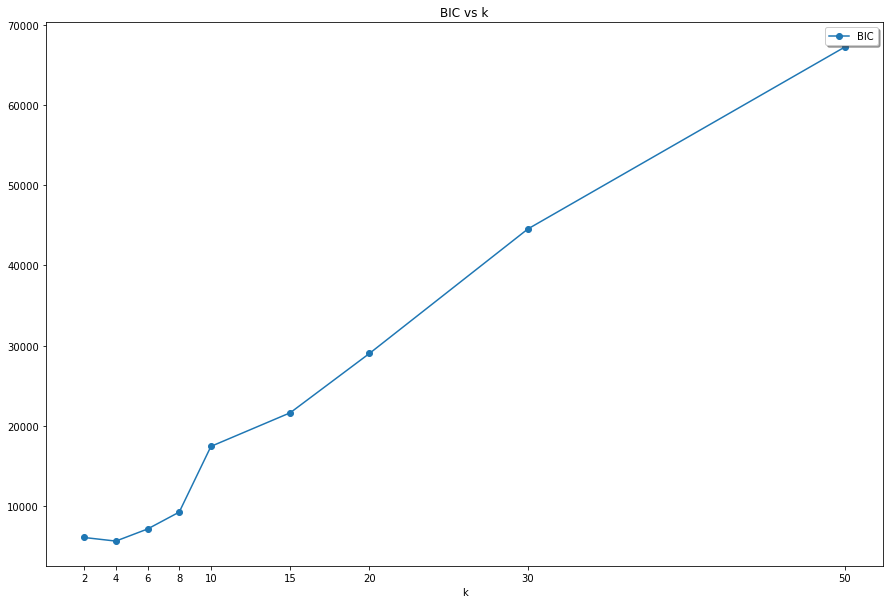

In [11]:
# fit time
fig, g = plt.subplots(1, 1, figsize=(15, 10))
plt.xticks(ks, ks)
g.set_title("BIC vs k")
g.set_xlabel('k')
g.plot(ks, bic, marker='o', label='BIC')
# g.plot(ks, aic, marker='o', label="AIC")
g.legend(shadow=True, fancybox=True)

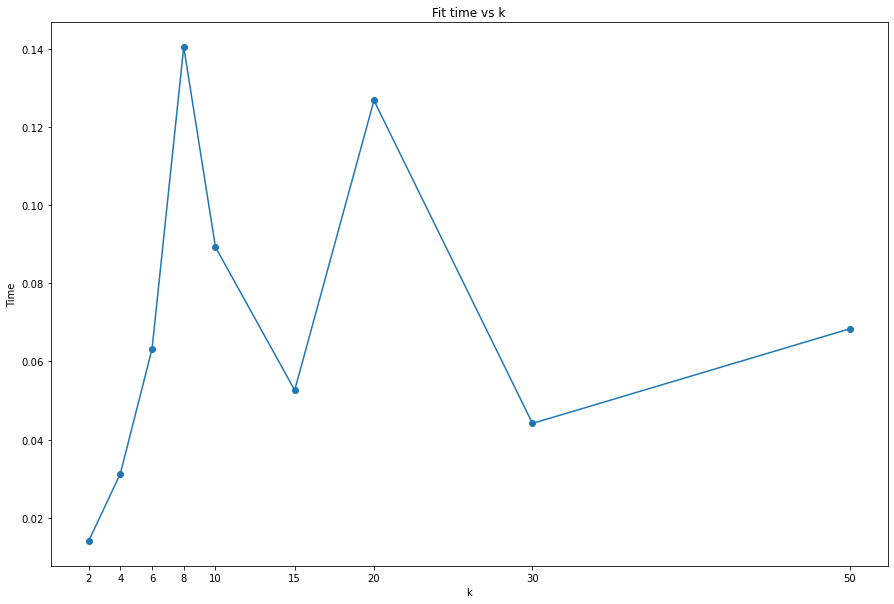

In [12]:
# fit time
fig, g = plt.subplots(1, 1, figsize=(15, 10))
plt.xticks(ks, ks)
g.set_title("Fit time vs k")
g.set_ylabel('Time')
g.set_xlabel('k')
g.plot(ks, times, marker='o')
# g.legend(shadow=True, fancybox=True)

[0.3216111131856197, 0.12928335244653885, 0.10173302311433716, 0.10903151088240823, 0.10599364252836037, 0.09869493378711108, 0.09190959637591184, 0.09033639779343185, 0.06898561838183054]


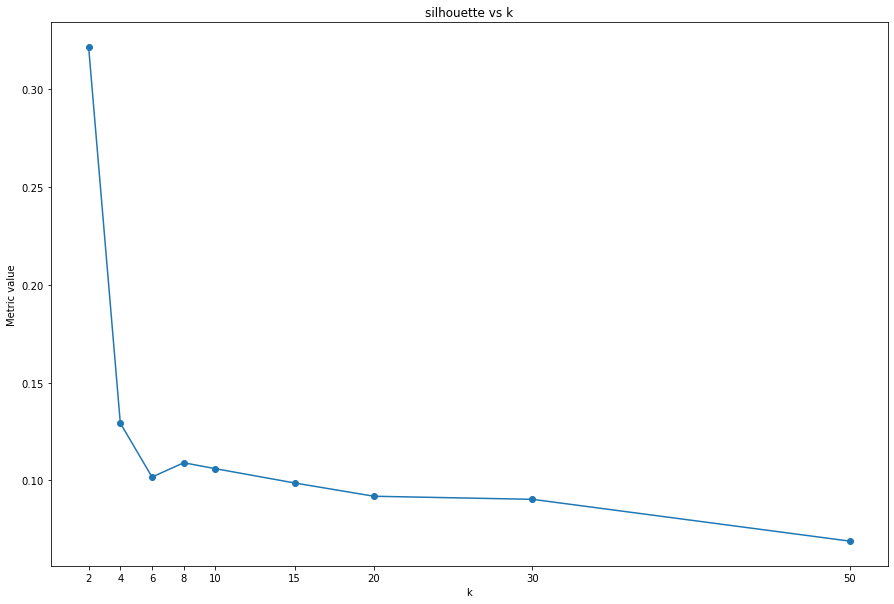

In [13]:
# silhouette
fig, g = plt.subplots(1, 1, figsize=(15, 10))
plt.xticks(ks, ks)
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("silhouette vs k")
g.set_ylabel('Metric value')
g.set_xlabel('k')
print(silhouette)
g.plot(ks, silhouette, marker='o')

In [14]:
labels = ["homo", "compl", "v-meas", "ARI", "AMI"]

-1
[0.66060469 0.37982698 0.41307357 0.37721507 0.35893643 0.32070342
 0.30623986 0.27171771 0.23834942]


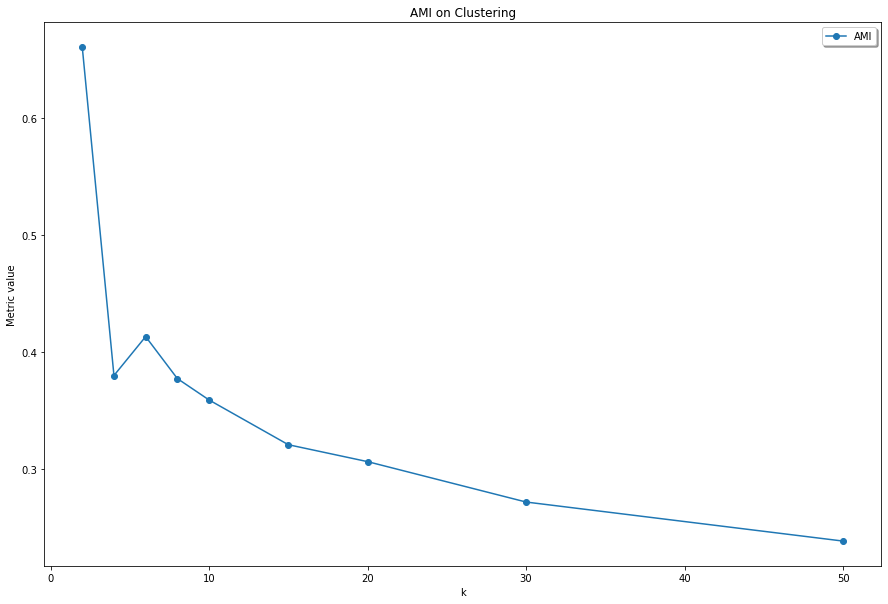

In [15]:
fig, g = plt.subplots(1, 1, figsize=(15, 10))
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("AMI on Clustering")
g.set_ylabel('Metric value')
g.set_xlabel('k')
idx = -1
print(idx)
print(other_metrics[idx])
g.plot(ks, other_metrics[idx], label=labels[idx], marker='o')
g.legend(shadow=True, fancybox=True)

0
[0.66196087 0.52805932 0.67539149 0.68760863 0.7382345  0.77898974
 0.76874234 0.80340994 0.82698349]
1
[0.6601559  0.2987869  0.30013332 0.26313209 0.24070092 0.20634965
 0.19734961 0.17149937 0.1512433 ]
2
[0.66105715 0.38163616 0.41558654 0.38061248 0.36303462 0.32627187
 0.31407156 0.28266075 0.25571926]
3
[0.77401598 0.37632572 0.33715242 0.2661159  0.20453675 0.13122516
 0.12564873 0.07011389 0.04337812]
4
[0.66060469 0.37982698 0.41307357 0.37721507 0.35893643 0.32070342
 0.30623986 0.27171771 0.23834942]


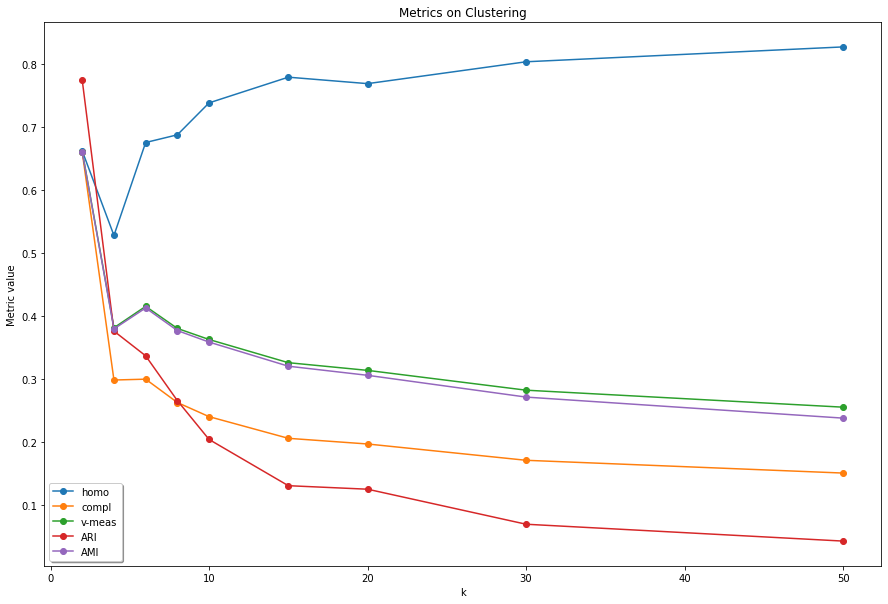

In [16]:
fig, g = plt.subplots(1, 1, figsize=(15, 10))
# plt.setp(g, xticks=ks, xticklabels=ks)
g.set_title("Metrics on Clustering")
g.set_ylabel('Metric value')
g.set_xlabel('k')
for idx in range(len(other_metrics)):
    print(idx)
    print(other_metrics[idx])
    g.plot(ks, other_metrics[idx], label=labels[idx], marker='o')
    g.legend(shadow=True, fancybox=True)